In [1]:
import gym
import numpy as np
import torch as T
from DQN import Agent

from disc_env import DiffDriveEnv
from utils import plotLearning

In [2]:
save_path = "models/"
save_file = "robot_model_0.pt"

In [3]:
def convert_observation(dictonary):
    observation = np.zeros(8, dtype=np.float32)
    observation[0:3] = dictonary['agent']
    observation[3] = dictonary['target'][0]
    observation[4] = dictonary['target'][1]
    observation[5] = dictonary['obstical'][0]
    observation[6] = dictonary['obstical'][1]
    observation[7] = dictonary['heading']
    return observation

In [4]:
env = DiffDriveEnv()

In [5]:
#     env.render_mode = "human"
agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[8], lr=0.003)

episode  0 score -44.46 average score -44.46 completed 0 epsilon 1.00
episode  50 score -42.14 average score -38.66 completed 1 epsilon 0.01
episode  100 score -42.11 average score -40.20 completed 0 epsilon 0.01
episode  150 score -51.00 average score -42.05 completed 0 epsilon 0.01
episode  200 score -42.11 average score -30.59 completed 3 epsilon 0.01
episode  250 score -42.15 average score -11.95 completed 5 epsilon 0.01
episode  300 score -51.00 average score -5.15 completed 5 epsilon 0.01
episode  350 score -41.99 average score -9.27 completed 4 epsilon 0.01
episode  400 score -51.00 average score -16.39 completed 3 epsilon 0.01
episode  450 score 332.46 average score -4.83 completed 7 epsilon 0.01
episode  500 score 332.94 average score 36.33 completed 14 epsilon 0.01
episode  550 score 332.18 average score 77.51 completed 18 epsilon 0.01
episode  600 score 331.85 average score 174.59 completed 40 epsilon 0.01
episode  650 score 331.02 average score 286.41 completed 48 epsilon 0

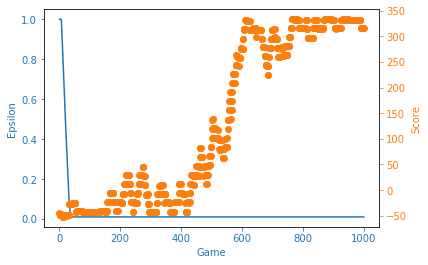

In [6]:
scores, eps_history = [], []
n_games = 2000

finished = 0
for i in range(n_games):
    observation = np.zeros(8, dtype=np.float32)
    score = 0
    done = False
    observation, info = env.reset()     
    observation = convert_observation(observation)
#         for _ in range(50):
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info, completed = env.step(action)
        observation_ = convert_observation(observation_)
#             score += reward 
        agent.store_transition(observation, action, reward, 
                                observation_, done)
        agent.learn()
        observation = observation_
    scores.append(reward)
    if completed: 
            finished +=1
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-100:])
    if i % 50 == 0:
        print('episode ', i, 'score %.2f' % reward,
                'average score %.2f' % avg_score, 'completed %d' % finished,
                'epsilon %.2f' % agent.epsilon)
        finished = 0
x = [i+1 for i in range(n_games)]
filename = 'score.png'
plotLearning(x, scores, eps_history, filename)

In [7]:
env.render_mode = "human"
observation, info = env.reset() 

In [8]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")

In [10]:
env.render_mode = "human"
env.robot_type = "real"
observation, info = env.reset()     

In [11]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")

linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0
linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0
linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0
linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0
linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0
linear: 
  x: -0.12
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0


In [ ]:
T.save(agent.state_dict(), save_path + save_file)

In [ ]:
agent = load_agent

In [ ]:
load_agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[6], lr=0.003)

load_agent.load_state_dict(T.load(save_path + save_file))